# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import holidays
from datetime import date



# Read CSV

In [3]:
df_hourly_weather = pd.read_csv('/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module01/Module01_Project03/data_provided/CBS_2021-2023_Hourly_Weather.csv')


# SneakPeak Data

## .head()

In [4]:

print('df_hourly_weather')
print(df_hourly_weather.head(30))



df_hourly_weather
    Casual        Date  Hour  Member  Total_rides  relativehumidity_2m (%)  \
0     20.0  2021-01-01     0    26.0         46.0                       90   
1     23.0  2021-01-01     1    23.0         46.0                       88   
2     20.0  2021-01-01     2    28.0         48.0                       87   
3      9.0  2021-01-01     3     7.0         16.0                       81   
4      7.0  2021-01-01     4     5.0         12.0                       77   
5     11.0  2021-01-01     5     3.0         14.0                       75   
6      8.0  2021-01-01     6    18.0         26.0                       72   
7     10.0  2021-01-01     7    17.0         27.0                       71   
8     22.0  2021-01-01     8    33.0         55.0                       71   
9     22.0  2021-01-01     9    54.0         76.0                       70   
10    29.0  2021-01-01    10    56.0         85.0                       69   
11    16.0  2021-01-01    11    40.0         5

## .columns

In [5]:

print('df_hourly_weather')
print(df_hourly_weather.columns)



df_hourly_weather
Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')


# ----------------------------------------------

# Hourly Weather Data set

## Cleaning / Organising

### Check for Null

In [6]:
df_hourly_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


### Check for Null Again

In [7]:
df_hourly_weather.isnull().sum()

Casual                     11
Date                        0
Hour                        0
Member                     11
Total_rides                11
relativehumidity_2m (%)     0
temperature_2m (°C)         0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
dtype: int64

In [8]:
df_hourly_weather = df_hourly_weather.dropna()



In [9]:
df_hourly_weather.isnull().sum()

Casual                     0
Date                       0
Hour                       0
Member                     0
Total_rides                0
relativehumidity_2m (%)    0
temperature_2m (°C)        0
weathercode (wmo code)     0
windspeed_10m (km/h)       0
dtype: int64

### Check Duplicates

In [10]:
df_hourly_weather.duplicated().sum()

np.int64(0)

### Turn to lowercase no spaces

In [11]:
df_hourly_weather.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')

In [12]:
df_hourly_weather = df_hourly_weather.rename(str.lower, axis=1)
df_hourly_weather = df_hourly_weather.rename(columns={'relativehumidity_2m (%)':'relativehumidity_2m_(%)','temperature_2m (°c)':'temperature_2m_(°c)', 'weathercode (wmo code)':'weathercode_(wmo code)', 'windspeed_10m_max (km/h)':'windspeed_10m_max_(km/h)' })
df_hourly_weather.columns

Index(['casual', 'date', 'hour', 'member', 'total_rides',
       'relativehumidity_2m_(%)', 'temperature_2m_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')

### Datetime

In [13]:
df_hourly_weather['date'] = pd.to_datetime(df_hourly_weather['date'])
df_hourly_weather['date'].info()

<class 'pandas.core.series.Series'>
Index: 26269 entries, 0 to 26279
Series name: date
Non-Null Count  Dtype         
--------------  -----         
26269 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 410.5 KB


In [14]:
df_hourly_weather['year'] = df_hourly_weather['date'].dt.year
df_hourly_weather['month'] = df_hourly_weather['date'].dt.month
df_hourly_weather['weekday'] = df_hourly_weather['date'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_hourly_weather['weekday'] = pd.Categorical(df_hourly_weather['weekday'], categories=weekday_order, ordered=True)

### Weekend / Weekdays

In [15]:

df_hourly_weather['day_type'] = df_hourly_weather['weekday'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

df_hourly_weather['day_type']


0        Weekday
1        Weekday
2        Weekday
3        Weekday
4        Weekday
          ...   
26275    Weekend
26276    Weekend
26277    Weekend
26278    Weekend
26279    Weekend
Name: day_type, Length: 26269, dtype: object

### Holiday

In [16]:
df_hourly_weather['year'].unique()


array([2021, 2022, 2023], dtype=int32)

In [17]:
# Define custom WA state holidays (if needed)
wa_holidays = holidays.US()
# Add any Washington-specific ones manually
wa_holidays.append({date(2025, 4, 16): "Washington State Holiday Example"})


# # Check if a date is a holiday
# print(date(2025, 7, 4) in wa_holidays)  # True (Independence Day)
# print(wa_holidays.get(date(2025, 7, 4)))  # 'Independence Day'

df_hourly_weather['holiday'] = df_hourly_weather['date'].dt.date.apply(lambda holiday: 1 if holiday in wa_holidays else 0)

df_hourly_weather.loc[df_hourly_weather['holiday'] == 0, 'is_holiday'] = 'No'
df_hourly_weather.loc[df_hourly_weather['holiday'] == 1, 'is_holiday'] = 'Yes'
df_hourly_weather['is_holiday']

#Check year 2021
df_hourly_weather_2021 = df_hourly_weather[df_hourly_weather['year'] == 2021].copy()
df_hourly_weather_2021.loc[:,'weekday_num'] = df_hourly_weather_2021['date'].dt.weekday
weekend_rows_2021 = df_hourly_weather_2021[df_hourly_weather_2021['weekday_num'] >= 5]

holiday_dates_weekend2021 = weekend_rows_2021[weekend_rows_2021['holiday'] == 1]['date'].dt.date.unique()
print(f"In 2021 there were {len(holiday_dates_weekend2021)} weekend days that were holidays")

#Check year 2022
df_hourly_weather_2022 = df_hourly_weather[df_hourly_weather['year'] == 2022].copy()
df_hourly_weather_2022.loc[:,'weekday_num'] = df_hourly_weather_2022['date'].dt.weekday
weekend_rows_2022 = df_hourly_weather_2022[df_hourly_weather_2022['weekday_num'] >= 5]

holiday_dates_weekend2022 = weekend_rows_2022[weekend_rows_2022['holiday'] == 1]['date'].dt.date.unique()
print(f"In 2022 there were {len(holiday_dates_weekend2022)} weekend days that were holidays")

#Check year 2023
df_hourly_weather_2023 = df_hourly_weather[df_hourly_weather['year'] == 2023].copy()
df_hourly_weather_2023.loc[:,'weekday_num'] = df_hourly_weather_2023['date'].dt.weekday
weekend_rows_2023 = df_hourly_weather_2023[df_hourly_weather_2023['weekday_num'] >= 5]

holiday_dates_weekend2023 = weekend_rows_2023[weekend_rows_2023['holiday'] == 1]['date'].dt.date.unique()
print(f"In 2023 there were {len(holiday_dates_weekend2023)} weekend days that were holidays")



In 2021 there were 3 weekend days that were holidays
In 2022 there were 3 weekend days that were holidays
In 2023 there were 2 weekend days that were holidays


In [18]:
df_hourly_weather.isnull().sum()
df_hourly_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26269 entries, 0 to 26279
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   casual                   26269 non-null  float64       
 1   date                     26269 non-null  datetime64[ns]
 2   hour                     26269 non-null  int64         
 3   member                   26269 non-null  float64       
 4   total_rides              26269 non-null  float64       
 5   relativehumidity_2m_(%)  26269 non-null  int64         
 6   temperature_2m_(°c)      26269 non-null  float64       
 7   weathercode_(wmo code)   26269 non-null  int64         
 8   windspeed_10m (km/h)     26269 non-null  float64       
 9   year                     26269 non-null  int32         
 10  month                    26269 non-null  int32         
 11  weekday                  26269 non-null  category      
 12  day_type                 26269 non-nu

### Season

In [19]:
def get_season(date):
    month = date.month
    day = date.day

    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day < 20):
        return '1'
    elif (month == 3 and day >= 20) or (month in [4, 5]) or (month == 6 and day < 21):
        return '2'
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day < 23):
        return '3'
    else:
        return '4'

df_hourly_weather['season'] = df_hourly_weather['date'].apply(get_season)

df_hourly_weather.loc[df_hourly_weather['season'] == 1, 'season'] = 'Winter'
df_hourly_weather.loc[df_hourly_weather['season'] == 2, 'season'] = 'Spring'
df_hourly_weather.loc[df_hourly_weather['season'] == 3, 'season'] = 'Summer'
df_hourly_weather.loc[df_hourly_weather['season'] == 4, 'season'] = 'Fall'



df_hourly_weather['season'].isnull().sum()

np.int64(0)

In [20]:
def get_season(date):
    month = date.month
    day = date.day

    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day < 20):
        return 'Winter'
    elif (month == 3 and day >= 20) or (month in [4, 5]) or (month == 6 and day < 21):
        return 'Spring'
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day < 23):
        return 'Summer'
    else:
        return 'Fall'

df_hourly_weather['season_name'] = df_hourly_weather['date'].apply(get_season)

df_hourly_weather['season_name']


0        Winter
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
26275    Winter
26276    Winter
26277    Winter
26278    Winter
26279    Winter
Name: season_name, Length: 26269, dtype: object

### Weather

In [21]:
weather_code_map = {
    0: 'Clear sky',
    1: 'Mainly clear',
    2: 'Partly cloudy',
    3: 'Overcast',
    45: 'Fog',
    48: 'Deposits of rime fog',
    51: 'Light drizzle',
    53: 'Moderate drizzle',
    55: 'Dense drizzle',
    56: 'Light freezing drizzle',
    57: 'Dense freezing drizzle',
    61: 'Slight rain',
    63: 'Moderate rain',
    65: 'Heavy rain',
    66: 'Light freezing rain',
    67: 'Heavy freezing rain',
    71: 'Slight snow fall',
    73: 'Moderate snow fall',
    75: 'Heavy snow fall',
    77: 'Snow grains',
    80: 'Slight rain showers',
    81: 'Moderate rain showers',
    82: 'Violent rain showers',
    85: 'Slight snow showers',
    86: 'Heavy snow showers',
    95: 'Thunderstorm',
    96: 'Thunderstorm with slight hail',
    99: 'Thunderstorm with heavy hail'
}

In [22]:
df_hourly_weather['weather_desc'] = df_hourly_weather['weathercode_(wmo code)'].map(weather_code_map)


In [23]:
df_hourly_weather['weather_desc']


0         Mainly clear
1         Mainly clear
2        Partly cloudy
3        Partly cloudy
4        Partly cloudy
             ...      
26275        Clear sky
26276        Clear sky
26277        Clear sky
26278        Clear sky
26279        Clear sky
Name: weather_desc, Length: 26269, dtype: object

## EDA

### Monthly Trend / Casual vs Member

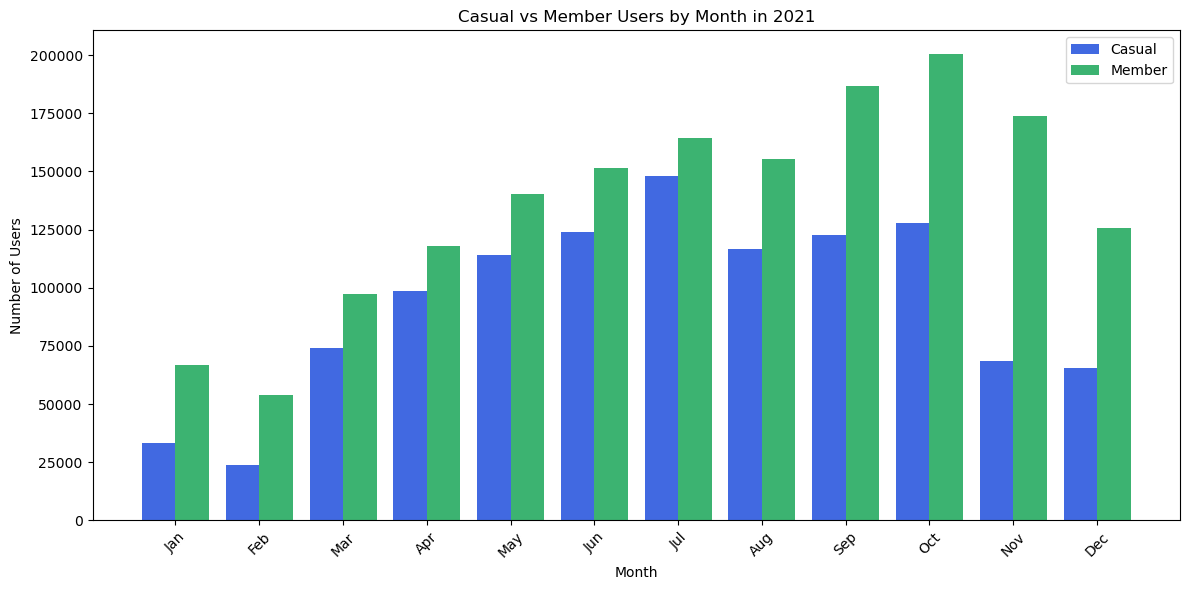

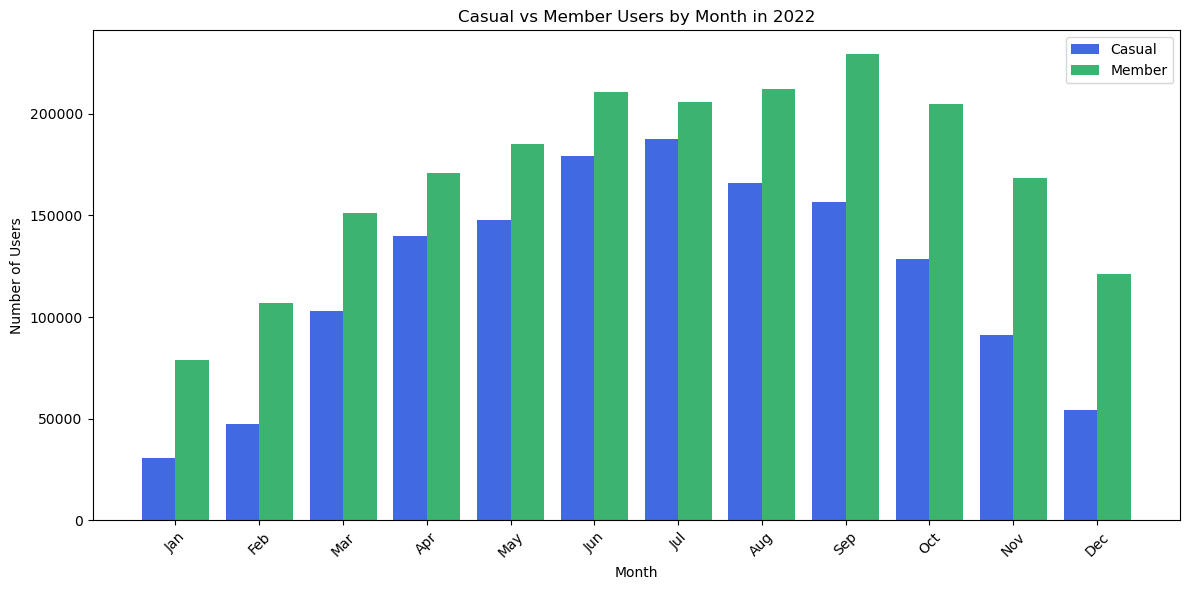

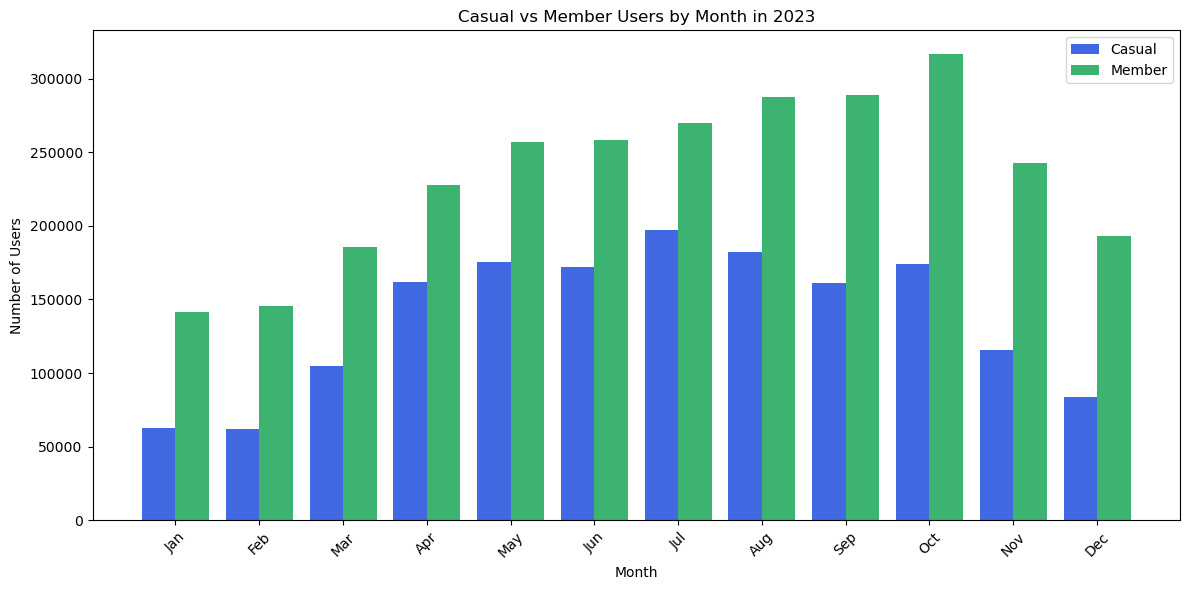

In [24]:
# To check if the data is accurate with our other data set, and it is. 

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_hourly_weather['year'] = df_hourly_weather['date'].dt.year
df_hourly_weather['month'] = df_hourly_weather['date'].dt.month

casual_by_month = df_hourly_weather.groupby('month')['casual'].sum()
member_by_month = df_hourly_weather.groupby('month')['member'].sum()
months = casual_by_month.index.astype(str)


monthly_users = df_hourly_weather.groupby(['year', 'month'])[['casual', 'member']].sum().reset_index()

for year in monthly_users['year'].unique():
    yearly_data = monthly_users[monthly_users['year'] == year]
    months = yearly_data['month']
    x = np.arange(len(months))
    width = 0.4

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, yearly_data['casual'], width=width, label='Casual', color='royalblue')
    plt.bar(x + width/2, yearly_data['member'], width=width, label='Member', color='mediumseagreen')

    plt.xticks(x, [month_names[m-1] for m in months], rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Number of Users')
    plt.title(f'Casual vs Member Users by Month in {year}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [25]:
df_hourly_weather.columns

Index(['casual', 'date', 'hour', 'member', 'total_rides',
       'relativehumidity_2m_(%)', 'temperature_2m_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m (km/h)', 'year', 'month',
       'weekday', 'day_type', 'holiday', 'is_holiday', 'season', 'season_name',
       'weather_desc'],
      dtype='object')

### Hourly trend

In [26]:
def assign_time_block(hour):
    if 0 <= hour <= 3:
        return 'Night 0-3'
    elif 4 <= hour <= 7:
        return 'Early Morning 4-7'
    elif 8 <= hour <= 11:
        return 'Morning 8-11'
    elif 12 <= hour <= 17:
        return 'Afternoon 12-17'
    else:
        return 'Evening 17-24'
    

df_hourly_weather['time_block'] = df_hourly_weather['hour'].apply(assign_time_block)
timeblock_order = ['Night 0-3', 'Early Morning 4-7', 'Morning 8-11', 'Afternoon 12-17', 'Evening 17-24']

df_hourly_weather['time_block'] = pd.Categorical(df_hourly_weather['time_block'])



#### Weekday Analysis

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_68155/2440900681.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_block_weekday = weekdays_df.groupby('time_block')['total_rides'].sum().reset_index()
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_68155/2440900681.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Time Block')


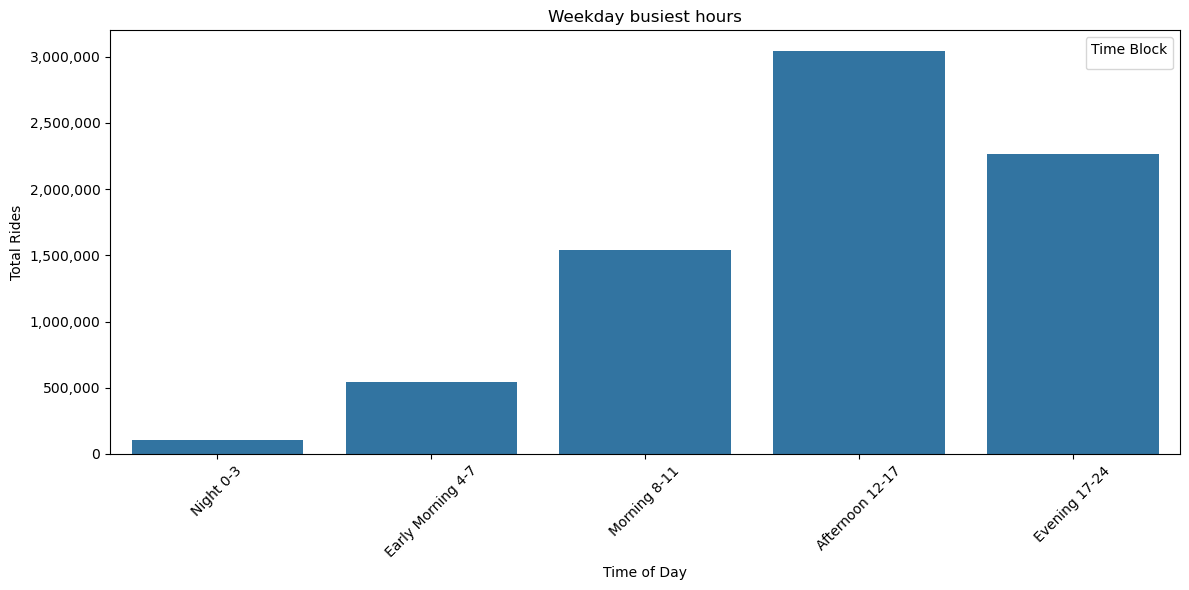

In [27]:
weekdays_df = df_hourly_weather[df_hourly_weather['day_type'].str.lower() == "weekday"]
time_block_weekday = weekdays_df.groupby('time_block')['total_rides'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=time_block_weekday,
    x='time_block',
    y='total_rides',
    order=timeblock_order
)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


plt.title('Weekday busiest hours')
plt.ylabel('Total Rides')
plt.xlabel('Time of Day')
plt.legend(title='Time Block')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


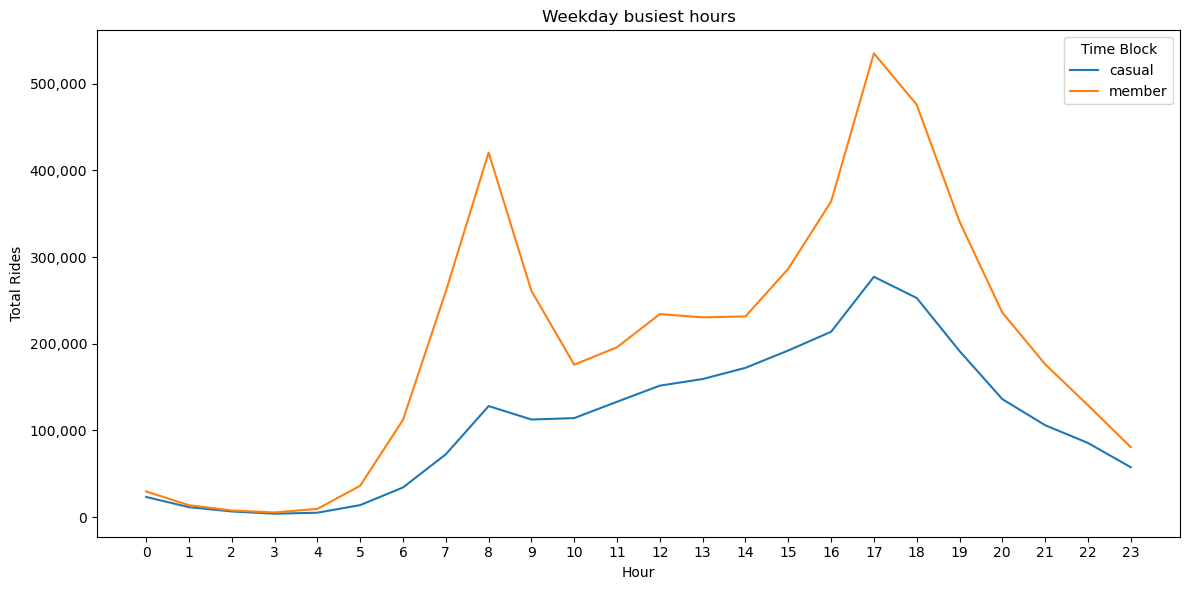

In [28]:
weekdays_df = df_hourly_weather[df_hourly_weather['day_type'].str.lower() == "weekday"]
time_block_weekday = weekdays_df.groupby('hour')[['casual', 'member']].sum().reset_index()

plt.figure(figsize=(12, 6))

plt.plot('hour', 
        'casual',
        data=time_block_weekday
)
plt.plot('hour', 
        'member',
        data=time_block_weekday
)

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


plt.title('Weekday busiest hours')
plt.ylabel('Total Rides')
plt.xlabel('Hour')
plt.legend(title='Time Block')
plt.xticks(range(24), rotation=0)
plt.tight_layout()
plt.show()


#### Weekend Analysis

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_68155/2256402289.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_block_weekends = weekends_df.groupby('time_block')['total_rides'].sum().reset_index()
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_68155/2256402289.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Time Block')


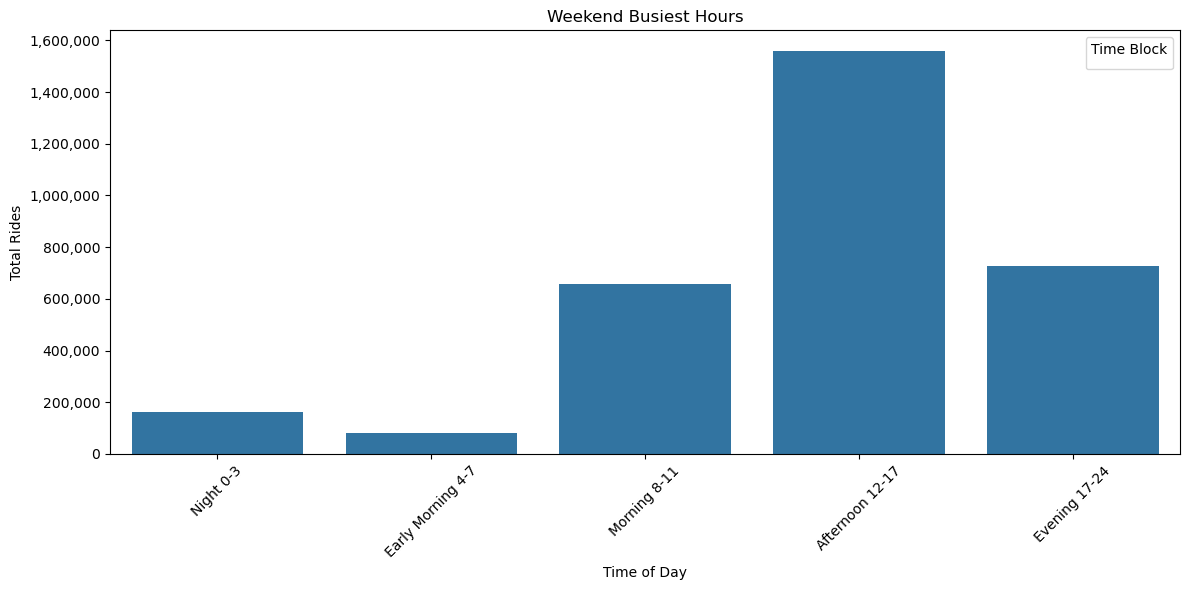

In [29]:
weekends_df = df_hourly_weather[df_hourly_weather['day_type'].str.lower() == "weekend"]
time_block_weekends = weekends_df.groupby('time_block')['total_rides'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=time_block_weekends,
    x='time_block',
    y='total_rides',
    order=timeblock_order
)

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


plt.title('Weekend Busiest Hours')
plt.ylabel('Total Rides')
plt.xlabel('Time of Day')
plt.legend(title='Time Block')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

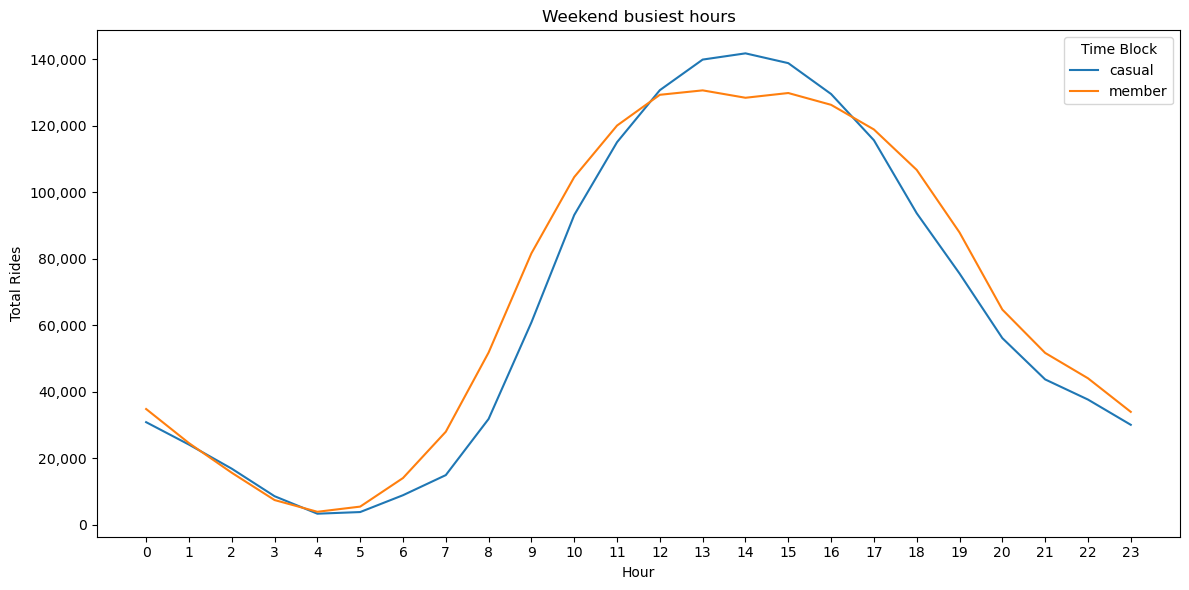

In [30]:
weekends_df = df_hourly_weather[df_hourly_weather['day_type'].str.lower() == "weekend"]
time_block_weekends = weekends_df.groupby('hour')[['casual', 'member']].sum().reset_index()

plt.figure(figsize=(12, 6))

plt.plot('hour', 
        'casual',
        data=time_block_weekends
)
plt.plot('hour', 
        'member',
        data=time_block_weekends
)

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Weekend busiest hours')
plt.ylabel('Total Rides')
plt.xlabel('Hour')
plt.legend(title='Time Block')
plt.xticks(range(24), rotation=0)
plt.tight_layout()
plt.show()


### Casual vs Member count per Season //// Needed by Hour

In [31]:
df_hourly_weather.columns

Index(['casual', 'date', 'hour', 'member', 'total_rides',
       'relativehumidity_2m_(%)', 'temperature_2m_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m (km/h)', 'year', 'month',
       'weekday', 'day_type', 'holiday', 'is_holiday', 'season', 'season_name',
       'weather_desc', 'time_block'],
      dtype='object')

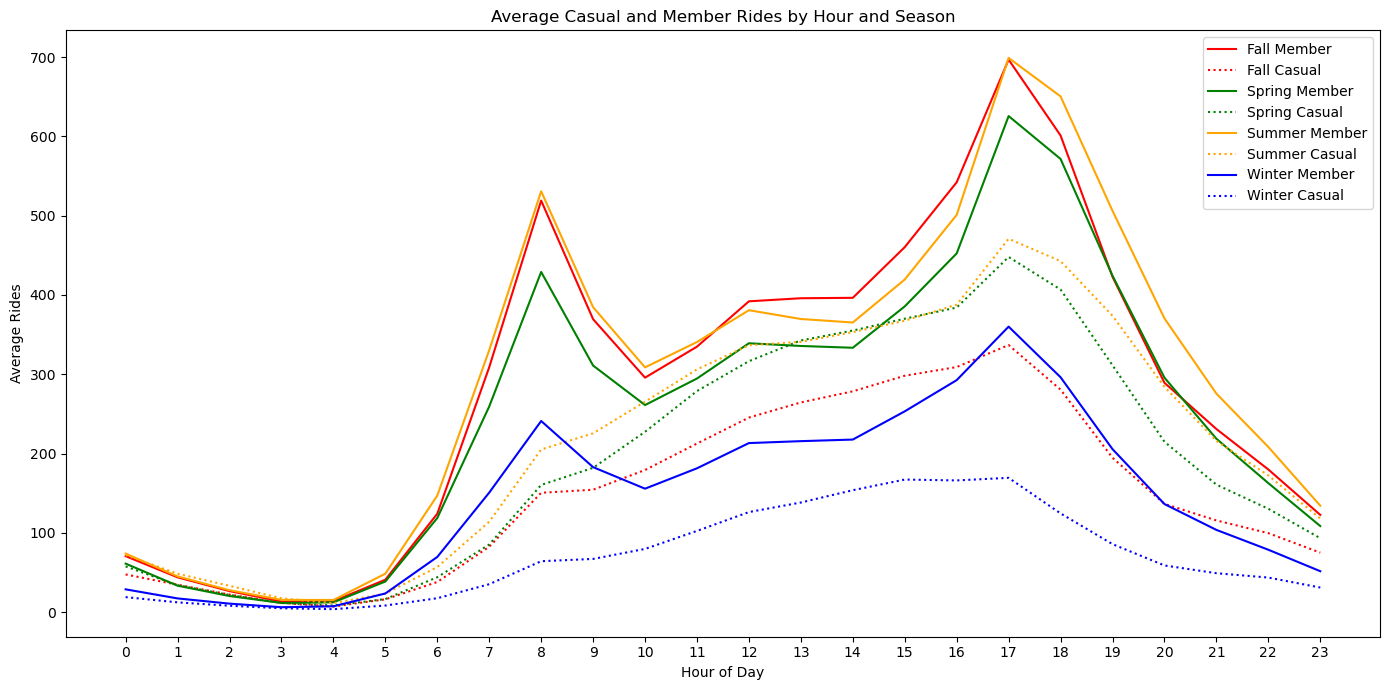

In [32]:
grouped = df_hourly_weather.groupby(['season_name', 'hour'])[['casual', 'member']].mean().reset_index()

grouped[grouped['season_name'] == 'Winter']

colors = {
    'Winter': 'blue',
    'Spring': 'green',
    'Summer': 'orange',
    'Fall': 'red'
}


plt.figure(figsize=(14, 7))

for season in grouped['season_name'].unique():
    season_data = grouped[grouped['season_name'] == season]
    color = colors.get(season, 'black')  # default to black if season missing
    
    # Plot member (solid line)
    plt.plot(season_data['hour'], season_data['member'], color=color, linestyle='-', label=f'{season} Member')
    
    # Plot casual (dotted line)
    plt.plot(season_data['hour'], season_data['casual'], color=color, linestyle=':', label=f'{season} Casual')

plt.xlabel('Hour of Day')
plt.xticks(range(24))
plt.ylabel('Average Rides')
plt.title('Average Casual and Member Rides by Hour and Season')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


In [34]:
df_hourly_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26269 entries, 0 to 26279
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   casual                   26269 non-null  float64       
 1   date                     26269 non-null  datetime64[ns]
 2   hour                     26269 non-null  int64         
 3   member                   26269 non-null  float64       
 4   total_rides              26269 non-null  float64       
 5   relativehumidity_2m_(%)  26269 non-null  int64         
 6   temperature_2m_(°c)      26269 non-null  float64       
 7   weathercode_(wmo code)   26269 non-null  int64         
 8   windspeed_10m (km/h)     26269 non-null  float64       
 9   year                     26269 non-null  int32         
 10  month                    26269 non-null  int32         
 11  weekday                  26269 non-null  category      
 12  day_type                 26269 non-nu

In [38]:
df_hourly_weather.head(10)

,casual,date,hour,member,total_rides,relativehumidity_2m_(%),temperature_2m_(°c),weathercode_(wmo code),windspeed_10m (km/h),year,month,weekday,day_type,holiday,is_holiday,season,season_name,weather_desc,time_block
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,2021,1,Friday,Weekday,1,Yes,1,Winter,Mainly clear,Night 0-3
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,2021,1,Friday,Weekday,1,Yes,1,Winter,Mainly clear,Night 0-3
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2021,1,Friday,Weekday,1,Yes,1,Winter,Partly cloudy,Night 0-3
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,2021,1,Friday,Weekday,1,Yes,1,Winter,Partly cloudy,Night 0-3
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,2021,1,Friday,Weekday,1,Yes,1,Winter,Partly cloudy,Early Morning 4-7
5,11.0,2021-01-01,5,3.0,14.0,75,1.4,2,8.7,2021,1,Friday,Weekday,1,Yes,1,Winter,Partly cloudy,Early Morning 4-7
6,8.0,2021-01-01,6,18.0,26.0,72,1.4,2,8.9,2021,1,Friday,Weekday,1,Yes,1,Winter,Partly cloudy,Early Morning 4-7
7,10.0,2021-01-01,7,17.0,27.0,71,1.4,3,7.9,2021,1,Friday,Weekday,1,Yes,1,Winter,Overcast,Early Morning 4-7
8,22.0,2021-01-01,8,33.0,55.0,71,1.4,3,7.1,2021,1,Friday,Weekday,1,Yes,1,Winter,Overcast,Morning 8-11
9,22.0,2021-01-01,9,54.0,76.0,70,1.6,3,7.2,2021,1,Friday,Weekday,1,Yes,1,Winter,Overcast,Morning 8-11


In [33]:
df_hourly_weather.columns

Index(['casual', 'date', 'hour', 'member', 'total_rides',
       'relativehumidity_2m_(%)', 'temperature_2m_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m (km/h)', 'year', 'month',
       'weekday', 'day_type', 'holiday', 'is_holiday', 'season', 'season_name',
       'weather_desc', 'time_block'],
      dtype='object')

In [36]:
weather_cols = ['date', 'hour', 'year', 'month', 'weekday',
                'temperature_2m_(°c)', 'relativehumidity_2m_(%)',
                'weathercode_(wmo code)']

df_weather_clean = df_hourly_weather[weather_cols].copy()

# Make sure 'date' is a date (not datetime)
df_weather_clean['date'] = pd.to_datetime(df_weather_clean['date']).dt.date


In [37]:
df_hourly_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26269 entries, 0 to 26279
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   casual                   26269 non-null  float64       
 1   date                     26269 non-null  datetime64[ns]
 2   hour                     26269 non-null  int64         
 3   member                   26269 non-null  float64       
 4   total_rides              26269 non-null  float64       
 5   relativehumidity_2m_(%)  26269 non-null  int64         
 6   temperature_2m_(°c)      26269 non-null  float64       
 7   weathercode_(wmo code)   26269 non-null  int64         
 8   windspeed_10m (km/h)     26269 non-null  float64       
 9   year                     26269 non-null  int32         
 10  month                    26269 non-null  int32         
 11  weekday                  26269 non-null  category      
 12  day_type                 26269 non-nu

In [39]:
df_weather_clean.to_csv("weather_clean.csv", index=False)


# --------------

# Notes

## Interactive chart that shows location per time of the day. 

## What interactive charts can I use, 